In [1]:
import requests
from bs4 import BeautifulSoup as BS
import pprint
import re
import time
import random
from collections import defaultdict
import pandas as pd

In [2]:
s = requests.Session()

r =s.get('https://play.google.com/store/apps/collection/cluster?clp=SjAKKgokcHJvbW90aW9uXzMwMDA3OTFfbmV3X3JlbGVhc2VzX2dhbWVzEEoYAzoCCAE%3D:S:ANO1ljIvgTM&gsr=CjJKMAoqCiRwcm9tb3Rpb25fMzAwMDc5MV9uZXdfcmVsZWFzZXNfZ2FtZXMQShgDOgIIAQ%3D%3D:S:ANO1ljJBvBg')

In [3]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [4]:
soup = BS(r.text)

urls = dict()

for i in soup.find('div', {'class':'ZmHEEd'}):
    k = i.find('div', {'class':'WsMG1c nnK0zc'}).get('title')
    v = i.find('div', {'class':'wXUyZd'}, recursive=True).find('a').get('href')
    v = re.search(r'(?<=id=)(.*)', v).groups()[0]
    
    urls[k] = deEmojify(v)

In [5]:
urls

{'Infinite Galaxy': 'com.camelgames.ig',
 'Gordon Ramsay: Chef Blast': 'com.outplayentertainment.chefblast',
 'Cubes Empire Champion': 'com.champion.cubes',
 'Redecor - Home Design Game': 'fi.reworks.redecor',
 'Pet Rescue Saga': 'com.king.petrescuesaga',
 'Hill Climb Racing': 'com.fingersoft.hillclimb',
 'Jetpack Joyride': 'com.halfbrick.jetpackjoyride',
 'Zombie Hunter D-Day': 'com.cle.dday',
 'Brick Ball Blast: Free Bricks Ball Crusher Game': 'com.brick.breaker.ball.shooting.blast',
 'Potion Punch 2: Fantasy Cooking Adventures': 'com.monstronauts.potionpunch2',
 'Pocket Family Dreams: Build My Virtual Home': 'com.kooapps.pocketfamily',
 'Beat Blader 3D: Dash and Slash!': 'com.ihd.beatsaber',
 'Sugar Hunter: Match 3 Puzzle': 'com.superbox.aos.pekomatch',
 'Smash & Flip : DDakji (PvP)': 'net.gameplete.ddak',
 'Love Nikki-Dress UP Queen': 'com.elex.nikkigp',
 'Hello Kitty Friends': 'com.SuperAwesome.HelloKittyFriends',
 'Choices: Stories You Play': 'com.pixelberrystudios.choices',
 'No

In [7]:
app_data = dict()
c =0
for app, app_url in urls.items():
    c+=1
    print(c)

    nap = random.uniform(0.5,.7)
    time.sleep(nap)
    r = requests.get('https://play.google.com/store/apps/details?id='+app_url)
    soup = BS(r.content, "html.parser")

    app_data[app] = dict()
    
    try:
        app_data[app]['rating'] = soup.find('div', {'class':'BHMmbe'}).text
        app_data[app]['app_name'] = soup.find('h1', {'class':'AHFaub'}).text
        app_data[app]['nr_reviews'] = soup.find('span', {'class':'EymY4b'}).text
        app_data[app]['for_users'] = soup.find('div', {'class': 'KmO8jd'}).text
    except AttributeError:
        print(f"Query for {app} had issues.")
        continue
        
    for i in soup.find_all('div', {'class', 'hAyfc'}):
        l = list()
        for j in i.find_all('div'):
            try:
                j.find('a').text
            except:
                l.append(j.text)
        if l[1:]:
            app_data[app][l[0]] = ", ".join(l[1:])
        # print(app_data[app][l[0]])
            
    data = {
      'f.req': '[[["xdSrCf","[[null,[\\"' + app_url + '\\",7],[]]]",null,"1"]]]',
        '': ''
    }
    # [[["xdSrCf","[[null,[\"com.halfbrick.jetpackjoyride\",7],[]]]",null,"1"]]]
    time.sleep(nap)
    response = requests.post('https://play.google.com/_/PlayStoreUi/data/batchexecute', data=data)
    
    
    app_data[app]['permissions'] = []
    for permission in re.findall(r'(?<=\[null,\\\").*?(?=\\)', response.text):
        app_data[app]['permissions'].append(permission)
    
app_data

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


{'Infinite Galaxy': {'rating': '4.6',
  'app_name': 'Infinite Galaxy',
  'nr_reviews': '3,873 total',
  'for_users': 'Everyone 10+',
  'Updated': 'January 11, 2021',
  'Size': '52M',
  'Installs': '100,000+',
  'Current Version': '1.0.0',
  'Requires Android': '5.1 and up',
  'Content Rating': 'Everyone 10+, Fantasy Violence, Mild Blood',
  'Interactive Elements': 'Users Interact, In-Game Purchases',
  'In-app Products': '$0.99 - $99.99 per item',
  'Offered By': 'Camel Games Limited',
  'Developer': '9/F., MW Tower, No.111 Bonham Strand, Sheung Wan, Hong Kong',
  'permissions': ['view Wi-Fi connections',
   'read the contents of your USB storage',
   'modify or delete the contents of your USB storage',
   'read the contents of your USB storage',
   'modify or delete the contents of your USB storage',
   'full network access',
   'prevent device from sleeping',
   'allow Wi-Fi Multicast reception',
   'view network connections',
   'receive data from Internet']},
 'Gordon Ramsay: Chef 

In [8]:
df = pd.DataFrame(app_data.values(), index=app_data.keys())
df

,rating,app_name,nr_reviews,for_users,Updated,Size,Installs,Current Version,Requires Android,Content Rating,Interactive Elements,In-app Products,Offered By,Developer,permissions
Infinite Galaxy,4.6,Infinite Galaxy,"3,873 total",Everyone 10+,"January 11, 2021",52M,"100,000+",1.0.0,5.1 and up,"Everyone 10+, Fantasy Violence, Mild Blood","Users Interact, In-Game Purchases",$0.99 - $99.99 per item,Camel Games Limited,"9/F., MW Tower, No.111 Bonham Strand, Sheung W...","[view Wi-Fi connections, read the contents of ..."
Gordon Ramsay: Chef Blast,4.7,Gordon Ramsay: Chef Blast,"7,458 total",Teen,"January 14, 2021",85M,"100,000+",1.8.2,4.4 and up,"Teen, Language",In-Game Purchases,$1.99 - $99.99 per item,Outplay Entertainment Ltd,"The Vision Building, 20 Greenmarket\nDundee DD...","[view Wi-Fi connections, view network connecti..."
Cubes Empire Champion,4.3,Cubes Empire Champion,"7,327 total",Everyone,"January 10, 2021",Varies with device,"1,000,000+",6.9.052,5.0 and up,Everyone,In-Game Purchases,$0.99 - $109.99 per item,Ilyon,POB 731\nRosh Haayin\n,"[view Wi-Fi connections, full network access, ..."
Redecor - Home Design Game,4.5,Redecor - Home Design Game,"99,833 total",Everyone,"January 13, 2021",34M,"1,000,000+",1.1.57,5.0 and up,Everyone,In-App Purchases,$0.99 - $119.99 per item,Reworks Ltd,"Runeberginkatu 5, 00100 Helsinki, Finland","[read phone status and identity, view Wi-Fi co..."
Pet Rescue Saga,4.6,Pet Rescue Saga,"3,457,260 total",Everyone,"January 11, 2021",80M,"100,000,000+",1.270.13,4.1 and up,Everyone,"Users Interact, Shares Info, Digital Purchases",$0.99 - $99.99 per item,King,"King.com Limited\nAragon Business Centre, Leve...","[view Wi-Fi connections, view network connecti..."
Hill Climb Racing,4.3,Hill Climb Racing,"10,016,281 total",Everyone,"January 8, 2021",58M,"500,000,000+",1.48.1,4.2 and up,Everyone,Digital Purchases,$2.50 - $123.00 per item,Fingersoft,Fingersoft Oy\nAleksanterinkatu 4-6\n90100\nOulu,"[view network connections, full network access..."
Jetpack Joyride,4.5,Jetpack Joyride,"4,896,248 total",Everyone 10+,"January 12, 2021",145M,"100,000,000+",1.38.1,4.4 and up,"Everyone 10+, Fantasy Violence",Digital Purchases,$0.99 - $119.99 per item,Halfbrick Studios,"23 Musgrave Road, Red Hill, Queensland 4059, A...","[view Wi-Fi connections, full network access, ..."
Zombie Hunter D-Day,4.4,Zombie Hunter D-Day,"26,728 total",Mature 17+,"January 4, 2021",74M,"1,000,000+",1.0.805,4.3 and up,"Mature 17+, Violence, Blood",In-Game Purchases,$1.49 - $79.99 per item,Clegames Inc.,help@clegames.com,"[view Wi-Fi connections, view network connecti..."
Brick Ball Blast: Free Bricks Ball Crusher Game,4.6,Brick Ball Blast: Free Bricks Ball Crusher Game,910 total,Everyone,"January 11, 2021",73M,"50,000+",2.0.0,5.0 and up,Everyone,In-Game Purchases,$0.99 - $59.99 per item,BVBStudio,Hong Kong,"[view Wi-Fi connections, view network connecti..."
Potion Punch 2: Fantasy Cooking Adventures,4.5,Potion Punch 2: Fantasy Cooking Adventures,"37,685 total",Everyone,"January 14, 2021",72M,"1,000,000+",1.6.4,4.4 and up,Everyone,In-Game Purchases,$1.99 - $94.99 per item,Monstronauts Inc.,"Unit 2 #969 Aurora Boulevard, Cubao, Quezon Ci...","[read the contents of your USB storage, modify..."


#### Data Science :)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
permissions = [r['permissions'] for i,r in df.iterrows()]
permissions_flat = [i for sublist in permissions for i in sublist]

In [11]:
apps = [[i]*len(r['permissions']) for i,r in df.iterrows()]
apps_flat = [i for sublist in apps for i in sublist]

In [12]:
df_permissions = pd.DataFrame({'app_name': apps_flat, 'permission': permissions_flat})
df_permissions = df_permissions.drop_duplicates()  # just making sure no doubles in here
df_permissions

,app_name,permission
0,Infinite Galaxy,view Wi-Fi connections
1,Infinite Galaxy,read the contents of your USB storage
2,Infinite Galaxy,modify or delete the contents of your USB storage
5,Infinite Galaxy,full network access
6,Infinite Galaxy,prevent device from sleeping
...,...,...
405,Space Shooter: Alien vs Galaxy Attack (Premium),control vibration
406,Space Shooter: Alien vs Galaxy Attack (Premium),full network access
407,Space Shooter: Alien vs Galaxy Attack (Premium),prevent device from sleeping
408,Space Shooter: Alien vs Galaxy Attack (Premium),view network connections


In [13]:
df_counts = df_permissions[['permission']].groupby('permission').size()
df_counts = df_counts.sort_values(ascending=True)
df_counts

permission
manage users                                          1
pair with Bluetooth devices                           1
read battery statistics                               1
draw over other apps                                  1
download files without notification                   1
disable your screen lock                              1
directly call phone numbers                           1
power device on or off                                1
create accounts and set passwords                     1
add or remove accounts                                1
access Bluetooth settings                             1
precise location (GPS and network-based)              1
control flashlight                                    2
close other apps                                      2
set an alarm                                          2
retrieve running apps                                 3
approximate location (network-based)                  3
find accounts on the device          

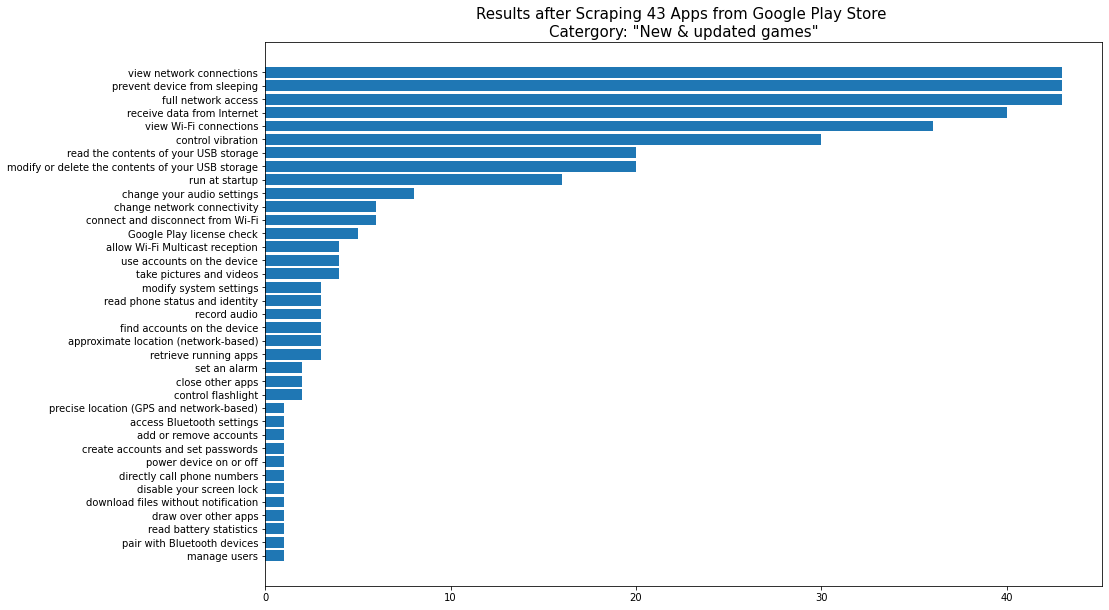

In [17]:
fig, ax = plt.subplots(figsize=(15,10))

nr_apps = len(df_permissions['app_name'].unique())
plt.title(f'Results after Scraping {nr_apps} Apps from Google Play Store \nCatergory: "New & updated games"', fontsize=15)

ax.barh(df_counts.index,
        df_counts.values)
plt.xticks()
plt.show()

In [15]:
nr_permissions = df_permissions.groupby(df_permissions['permission']).size()
nr_permissions#.describe()

permission
Google Play license check                             5
access Bluetooth settings                             1
add or remove accounts                                1
allow Wi-Fi Multicast reception                       4
approximate location (network-based)                  3
change network connectivity                           6
change your audio settings                            8
close other apps                                      2
connect and disconnect from Wi-Fi                     6
control flashlight                                    2
control vibration                                    30
create accounts and set passwords                     1
directly call phone numbers                           1
disable your screen lock                              1
download files without notification                   1
draw over other apps                                  1
find accounts on the device                           3
full network access                  

In [16]:
df_permissions[df_permissions.permission.str.contains('storage')]

,app_name,permission
1,Infinite Galaxy,read the contents of your USB storage
2,Infinite Galaxy,modify or delete the contents of your USB storage
23,Redecor - Home Design Game,read the contents of your USB storage
24,Redecor - Home Design Game,modify or delete the contents of your USB storage
61,Potion Punch 2: Fantasy Cooking Adventures,read the contents of your USB storage
62,Potion Punch 2: Fantasy Cooking Adventures,modify or delete the contents of your USB storage
78,Beat Blader 3D: Dash and Slash!,modify or delete the contents of your USB storage
79,Beat Blader 3D: Dash and Slash!,read the contents of your USB storage
93,Smash & Flip : DDakji (PvP),read the contents of your USB storage
94,Smash & Flip : DDakji (PvP),modify or delete the contents of your USB storage
